In [1]:
!python --version

Python 3.12.3


In [15]:
!pip install tensorflow

In [217]:
"""For the Deep Learning using TensorFlow and Keras course;
   Author: Arta Khosravi
   Nov. 2025""";

---------

## Installing the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [8]:
tf.__version__,keras.__version__

('2.20.0', '3.11.3')

## Importing the fashion mnist dataset

In [67]:
fmnist_data = keras.datasets.fashion_mnist
#shape of fmnist_data: (28,28,1)
#10 labels/outputs

In [69]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

## Initial checks

In [71]:
x_train.shape, x_test.shape, y_train.shape, x_test.shape #np.concatenate((x_train,x_test),axis=0) if you want to do 80/20

((60000, 28, 28), (10000, 28, 28), (60000,), (10000, 28, 28))

In [73]:
y_train[:10] #vector #the label of our outputs: Tshirt, Trousers, etc.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [75]:
x_train[8:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,  39,   1,   0],
        ...,
        [  0,   0,   0, ..., 238,   0,   0],
        [  0,   0,   0, ..., 131,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   7,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   9,   0],
        [  0,   0,   0, ...,   0,   3,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

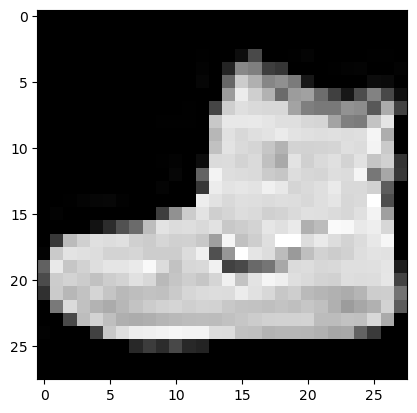

In [77]:
plt.imshow(x_train[0,], cmap="gray")

## Normalizing the Data

In [81]:
"""
Normalizing the data so that our model won't have the possibility of overfitting.
Important to note that the normalizer is made on the train data, as in it is fit on train and then checked on test.
"""
max_norm=[];min_norm=[]
for i in range(27):
    max_norm.append(max(x_train[0][i]))
    min_norm.append(min(x_train[0][i]))
print(max(max_norm),min(min_norm))
x_train, x_test = x_train/max(max_norm), x_test/max(max_norm)

255 0


## Defining the Model

#### First way to build the model:

In [112]:
model = keras.models.Sequential() #choosing a sequential model
#Dense models are expected to have the input layer to be a vector/1d array (x).
#If our input layer was recieving images, they wouldn't be 1d arrays, but 2d. So we should change that.
#Thus, we manually change and add the layer to "Flatten."
"""
The first layer is Flat:
First arguement: input_shape: The shape of the input data, which in our required images are 28x28.
"""
"""
The hidden layers are dense: 
First arguement: units, or the number of neurons: better chosen between 10-100. Here our number of choice is 100 neurons,
Second arguement: activation: The activation function is ReLU/softmax/etc. (return to the "Theory" folder.),
Further arguements, like Kernel Initializer will be important further on.
"""
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [116]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

#### Second way to build the model

In [120]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [122]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model.layers

[<Flatten name=flatten_12, built=True>,
 <Dense name=dense_36, built=True>,
 <Dense name=dense_37, built=True>,
 <Dense name=dense_38, built=True>]

In [126]:
weights, bias = model.layers[1].get_weights()

In [128]:
weights

array([[-0.00157925,  0.00520459,  0.03730167, ..., -0.05088088,
         0.04950237,  0.077829  ],
       [-0.0678473 ,  0.03910518,  0.00075192, ...,  0.07963331,
        -0.07479788, -0.03577987],
       [ 0.0179349 , -0.07083517, -0.03118351, ...,  0.08175302,
         0.01598358,  0.04572859],
       ...,
       [ 0.07223512, -0.0542409 ,  0.07342736, ...,  0.00502779,
         0.01616618, -0.0819426 ],
       [-0.0187485 ,  0.01356652,  0.0021105 , ...,  0.0480535 ,
         0.03980734,  0.01844622],
       [-0.07060667, -0.06229797, -0.05056955, ...,  0.06394675,
        -0.03051646, -0.05777735]], dtype=float32)

In [130]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Compiling the Model

In [146]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Fitting the model

In [148]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8367 - loss: 0.4680 - val_accuracy: 0.8374 - val_loss: 0.4559
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8485 - loss: 0.4349 - val_accuracy: 0.8431 - val_loss: 0.4414
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8545 - loss: 0.4132 - val_accuracy: 0.8477 - val_loss: 0.4300
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8611 - loss: 0.3954 - val_accuracy: 0.8592 - val_loss: 0.3959
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8652 - loss: 0.3821 - val_accuracy: 0.8528 - val_loss: 0.4242
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8683 - loss: 0.3715 - val_accuracy: 0.8438 - val_loss: 0.4264
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8726 - loss: 0.3605 - val_accuracy: 0.8642 - val_loss: 0.3796
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8746 - loss: 0.3522 - 

In [150]:
print(history.history)

{'accuracy': [0.8367254734039307, 0.8484509587287903, 0.8544902205467224, 0.8611176609992981, 0.8652156591415405, 0.8683333396911621, 0.8725882172584534, 0.8746470808982849, 0.8776078224182129, 0.8786470293998718, 0.8816274404525757, 0.8841961026191711, 0.8850980401039124, 0.8876078724861145, 0.8890784382820129, 0.8899411559104919, 0.891196072101593, 0.8944509625434875, 0.8956274390220642, 0.8968627452850342, 0.8989999890327454, 0.8999019861221313, 0.9009215831756592, 0.9024313688278198, 0.9028627276420593, 0.9053921699523926, 0.9064509868621826, 0.9064705967903137, 0.9104117751121521, 0.9108431339263916, 0.9106862545013428, 0.9123921394348145, 0.9129999876022339, 0.9139412045478821, 0.9149019718170166, 0.9164705872535706, 0.9174705743789673, 0.9195098280906677, 0.9194706082344055, 0.9213725328445435, 0.921137273311615, 0.9227254986763, 0.9223333597183228, 0.9244706034660339, 0.9256666898727417, 0.9252156615257263, 0.9259803891181946, 0.9268235564231873, 0.9276666641235352, 0.928980410